# Runge Kutta

> **Questions**
>
> -   How do I use the Runge-Kutta method for more accurate solutions?
> -   What do the terms first-order accurate and second-order accurate
>     mean?

> **Objectives**
>
> -   Use the Runge-Kutta method, implemented in Python, to solve a
>     first-order ODE
> -   Compare results at different levels of approximation using the
>     `matplotlib` library.

### The Runge-Kutta method is more accurate than Euler’s method and runs just as fast

So far we have used Euler’s method for solving ODEs. We have learnt
that, using this method, the final expression for the total error is
linear in $h$. However for roughly the same compute time we can reduce
the total error so it is of order $h^2$ by implementing another method -
the <bold>Runge-Kutta method</bold>.

It is common to use the Runge-Kutta method for solving ODEs given the
improved accuracy over Euler’s method. However Euler’s method is still
commonly used for PDEs (where there are other, larger, sources of
error).

> Note: The Runge-Kutta method is actually a family of methods. In fact,
> Euler’s method is the first-order Runge-Kutta method. There is then
> the second-order Runge-Kutta method, third-order Runge-Kutta method,
> and so on..

Euler’s method does not take into account the curvature of the solution,
whilst Runge-Kutta methods do, by calculating the gradient at
intermediate points in the (time-)step. For example, in the image below
we see two estimates to the blue line. Euler’s method is equivalent to
the orange line, where we have taken the slope at time $t$ and
extrapolated it to $t+h$. A Runge-Kutta type method performs
extrapolation using the slope (or slopes) at an intermediate time (or
multiple intermediate times). In this case, the green line formed from
the slope at $t+\frac{h}2$ gives a better approximation at $t+h$. This
green line is a visual representation of the second-order Runge Kutta
method, which is also known as the “midpoint method”.

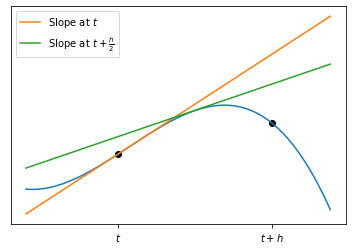

### Runge-Kutta methods are derived from Taylor expansion(s) around intermediate point(s)

To derive the second-order Runge-Kutta method we:

1.  estimate $x(t+h)$ using a Taylor expansion around $t+\frac{h}{2}$:

1.  estimate $x(t)$ using a Taylor expansion around $t-\frac{h}{2}$:

1.  Subtract Equation 2 from Equation 1 and re-arrange:

Note that the $h^2$ term has completely disappeared, and the error term
is now order $h^3$. We can say that this approximation is now accurate
to order $h^2$.

The problem is that this requires knowledge of $x(t+\frac{h}{2})$ which
we don’t currently have. We can however estimate this using the Euler
method!

Substituting this into Equation 3 above, we can write the method for a
single step as follows:

See how $k_1$ is used to give an estimate for $x(t+\frac{h}{2})$ in
$k_2$, which is then substituted into the third equation to give an
estimate for $x(t+h)$.

> **Note**
>
> Higher orde Runge-Kutta methods can be derived in a similar way - by
> calculating the Taylor series around various points and then taking a
> linear combination of the resulting expansions. As we increase the
> number of intermediate points, we increase the accuracy of the method.
> The downside is that the equations get increasingly complicated.

\### Runge-Kutta methods can be applied using the Python skills we have
developed

To demonstrate the Runge-Kutta method with a simple example, we will
re-visit the differential equation for nuclear decay. We will model the
decay process over a period of 10 seconds, with the decay constant
$\lambda=0.1$ and the initial condition $N_0 = 1000$:

First, let’s import the standard scientific libraries we will be using -
Numpy and Matplotlib:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let’s definte the function $f(N,t)$ which describes the rate of decay.
In this case, the function depends only on the number of atoms present.

In [2]:
# define the function for nuclear decay
def f(Num_atoms):
    return -0.1*Num_atoms

Next we’ll list the simulation parameters: start time, end time, number
of time steps and step size (which is calculated using the number of
time steps). For comparison, these will be the same as we used for
Euler’s method.

In [3]:
a = 0                  # start time
b = 10                 # end time
num_steps = 5         # number of time steps
h = (b-a) / num_steps  # time step size

We then specify the initial conditions - which in this case is the
number of atoms to begin with:

In [4]:
Num_atoms = 1000       # initial condition

We use the Numpy `arange` function to generate a list of evenly spaced
times at which to evaluate the number of atoms. We also create an empty
list to hold the values for $N$ over time.

In [5]:
# use the Numpy arange function to generate a list of evenly spaced times at which to evaluate the number of atoms N.
time_list = np.arange(a,b,h)

# create an empty list to hold the calculated N values
Num_atoms_list = []

Finally, we apply second-order Runge-Kutta method using a `For` loop.

In [6]:
# apply Runge-Kutta method. 
for time in time_list:
    Num_atoms_list.append(Num_atoms)
    k1 = h*f(Num_atoms)
    k2 = h*f(Num_atoms+0.5*k1)
    Num_atoms += k2

### We can easily compare our various models using the `matplotlib` plotting library

Using the analytic solution from a previous lesson, we can define a
function for calculating the number of atoms $N$ as a function of time
(this is the exact solution).

In [7]:
def analytic_solution(time):
    return 1000*np.exp(-0.1*time)

We can use this to calculate the exact value for $N$ over the full time
range. We use a large number of points in time (in this case 1000) to
give a nice smooth curve - note that we have renamed the variables for
the analytic case so we do not override the original calculation
parameters.

In [8]:
num_steps_analytic = 1000
h_analytic = (b-a) / num_steps_analytic
time_analytic_list = np.arange(a,b,h_analytic)
Num_atoms_analytic_list = []

for time in time_analytic_list:
    Num_atoms_analytic_list.append(analytic_solution(time))

We can also re-calculate the atom population using Euler’s method for
comparison to the Runge-Kutta method:

In [9]:
Num_atoms = 1000
Num_atoms_euler_list = []

for time in time_list:
    Num_atoms_euler_list.append(Num_atoms)
    Num_atoms += h*f(Num_atoms)

Finally we plot all three models side-by-side:

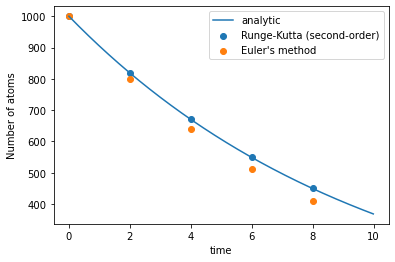

In [10]:
plt.plot(time_analytic_list,Num_atoms_analytic_list,label="analytic")
plt.scatter(time_list, Num_atoms_list,label="Runge-Kutta (second-order)")
plt.scatter(time_list, Num_atoms_euler_list,label="Euler's method")
plt.xlabel("time")
plt.ylabel("Number of atoms")
plt.legend()

### The second-order Runge-Kutta method is accurate to order $h^2$

-   We have seen earlier in the course that Euler’s method is a
    first-order method accurate to order $h$.
-   The error term for one step of the Runge-Kutta method is
    ${O}(h^3)$ - this makes the Runge-Kutta method accurate to order
    $h^2$ which is why this is called the <mark>second-order</mark>
    Runge Kutta method (RK2).
-   With the RK2 can use a fewer number of steps whilst getting the same
    accuracy as Euler’s method.
-   There are higher order Runge-Kutta methods which increase the
    accuracy further.

> **Keypoints**
>
> -   The Runge-Kutta method is more accurate than Euler’s method and
>     runs just as fast
> -   Runge-Kutta methods are derived from Taylor expansion(s) around
>     intermediate point(s)
> -   Runge-Kutta methods can be applied using the Python skills we have
>     developed
> -   We can easily compare our various models using the `matplotlib`
>     plotting library
> -   The second-order Runge-Kutta method is accurate to order $h^2$